<a href="https://colab.research.google.com/github/shubhampatelcs/DataMining_project_/blob/main/Data_Mining_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
import csv
import json
import random
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from datasets import Dataset, DatasetDict

# Read Grocery data

In [6]:
data = []

with open("/content/drive/MyDrive/DM3/Grocery_Items_23.csv", "r") as file_:
    csv_reader = csv.reader(file_)

    next(csv_reader)

    for row in csv_reader:
        row = list(filter(lambda x: x != '', row))
        data.append(row)

# 1 (c).

In [7]:
all_items = []
for row in data:
  for item in row:
    all_items.append(item)

In [8]:
len(set(all_items))

166

The Number of Unique Items is 166

In [9]:
len(data)

8000

Total Number of records in 8000

In [10]:
from collections import Counter

my_counter = Counter(all_items)

max_element = my_counter.most_common(1)[0]
print(max_element)

('whole milk', 1366)


The most popular item is 'whole milk' and 1366 transaction contain this item

# 1(d)

In [11]:
def fit_association_rules(dataset,support,confidence):
  te = TransactionEncoder()
  te_ary = te.fit(dataset).transform(dataset)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  frequent_itemsets = fpgrowth(df, min_support=support, use_colnames=True)
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence,num_itemsets=len(df))
  return rules


In [12]:
rules = fit_association_rules(data,0.01,0.08)

In [13]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(whole milk),0.124250,0.161875,0.015500,0.124748,0.770647,1.0,-0.004613,0.957582,-0.253640,0.057275,-0.044297,0.110251
1,(whole milk),(other vegetables),0.161875,0.124250,0.015500,0.095753,0.770647,1.0,-0.004613,0.968485,-0.262042,0.057275,-0.032540,0.110251
2,(rolls/buns),(whole milk),0.111250,0.161875,0.014750,0.132584,0.819053,1.0,-0.003259,0.966232,-0.199087,0.057088,-0.034948,0.111852
3,(whole milk),(rolls/buns),0.161875,0.111250,0.014750,0.091120,0.819053,1.0,-0.003259,0.977852,-0.208604,0.057088,-0.022650,0.111852
4,(rolls/buns),(other vegetables),0.111250,0.124250,0.010875,0.097753,0.786743,1.0,-0.002948,0.970632,-0.233713,0.048414,-0.030257,0.092639
5,(other vegetables),(rolls/buns),0.124250,0.111250,0.010875,0.087525,0.786743,1.0,-0.002948,0.973999,-0.236362,0.048414,-0.026695,0.092639
6,(yogurt),(whole milk),0.086500,0.161875,0.011875,0.137283,0.848082,1.0,-0.002127,0.971495,-0.163945,0.050211,-0.029341,0.105321
7,(soda),(whole milk),0.098250,0.161875,0.013500,0.137405,0.848831,1.0,-0.002404,0.971632,-0.164923,0.054739,-0.029197,0.110401
8,(whole milk),(soda),0.161875,0.098250,0.013500,0.083398,0.848831,1.0,-0.002404,0.983796,-0.175249,0.054739,-0.016471,0.110401
9,(soda),(other vegetables),0.098250,0.124250,0.010500,0.106870,0.860123,1.0,-0.001708,0.980541,-0.152789,0.049528,-0.019846,0.095689


# 1(e)

In [14]:
min_supports_values = [0.001, 0.005, 0.01]
min_confidence_values = [0.05, 0.075, 0.1]
heat_map = []
for min_confidence in min_confidence_values:
  temp = []
  for min_support in min_supports_values:
    rules = fit_association_rules(data,min_support,min_confidence)
    temp.append(len(rules))
  heat_map.append(temp)

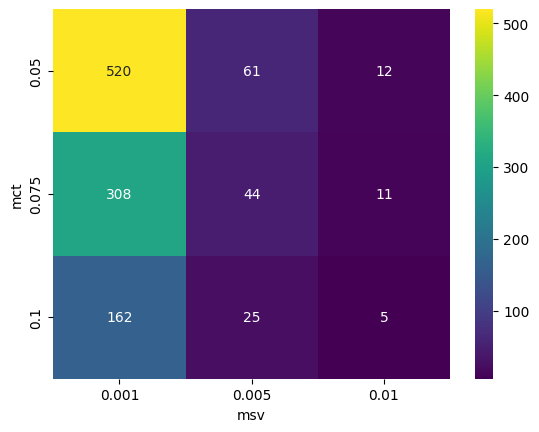

In [15]:
sns.heatmap(heat_map, annot=True,fmt='d',cmap='viridis')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=min_supports_values)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=min_confidence_values)
plt.xlabel("msv")
plt.ylabel("mct")
plt.show()

# 2 Create and compile model

In [17]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])



In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 4)         │             292 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15376)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │         123,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,568 (482.69 KB)

 Trainable params: 123,568 (482.69 KB)

 Non-trainable params: 0 (0.00 B)

# Read Image Data

In [20]:
path = "/content/drive/MyDrive/DM3/updated"

In [22]:
batch_size = 16
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=100
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=100
)

Found 659 files belonging to 4 classes.
Using 528 files for training.
Found 659 files belonging to 4 classes.
Using 131 files for validation.


# Train Model

In [23]:
history = model.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.2415 - loss: 56.8145 - val_accuracy: 0.2366 - val_loss: 1.5235
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3690 - loss: 1.3270 - val_accuracy: 0.2290 - val_loss: 1.4999
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.4464 - loss: 1.2150 - val_accuracy: 0.2901 - val_loss: 1.5305
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.4810 - loss: 1.1148 - val_accuracy: 0.2901 - val_loss: 1.5962
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5970 - loss: 0.9940 - val_accuracy: 0.3053 - val_loss: 1.6106
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6070 - loss: 0.9415 - val_accuracy: 0.3282 - val_loss: 1.7379
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6767 - loss: 0.8280 - val_accuracy: 0.3511 - val_loss: 1.9491
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6946 - loss: 0.7848 - val_accuracy: 0.3359 - v

# 2 (a)

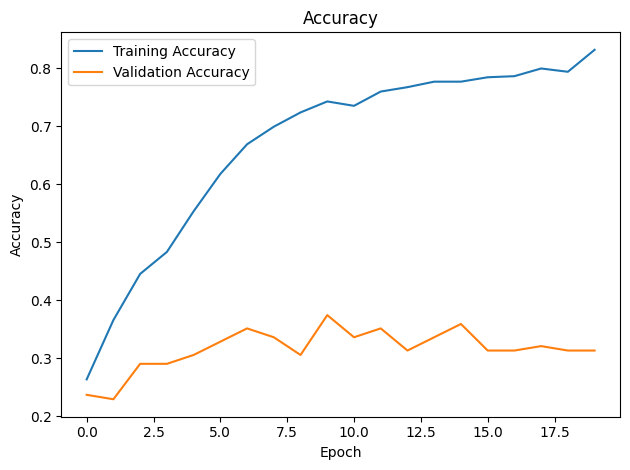

In [24]:

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']


plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# 2 (b). Experiment with nodes changes to 4 and 16

In [25]:
new_model1 = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])



new_model2 = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])






# Compile new models

In [26]:
new_model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])
new_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

In [27]:
new_model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 8)         │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │         246,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,868 (964.33 KB)

 Trainable params: 246,868 (964.33 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
new_model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │         492,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 493,468 (1.88 MB)

 Trainable params: 493,468 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

# Train new model 1

In [29]:
new_history1 = new_model1.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.2305 - loss: 29.1985 - val_accuracy: 0.1985 - val_loss: 1.3867
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2787 - loss: 1.3851 - val_accuracy: 0.1985 - val_loss: 1.3872
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.3072 - loss: 1.3845 - val_accuracy: 0.1985 - val_loss: 1.3876
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2866 - loss: 1.3839 - val_accuracy: 0.1985 - val_loss: 1.3882
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.2969 - loss: 1.3833 - val_accuracy: 0.1985 - val_loss: 1.3889
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.2868 - loss: 1.3833 - val_accuracy: 0.1985 - val_loss: 1.3891
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.2728 - loss: 1.3846 - val_accuracy: 0.1985 - val_loss: 1.3896
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2804 - loss: 1.3829 - val_accuracy: 0.1985 -

# Train New Model 2

In [30]:
new_history2 = new_model2.fit(dataset,validation_data=validation_dataset,epochs=20)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.3036 - loss: 20.8716 - val_accuracy: 0.2977 - val_loss: 1.3860
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.2478 - loss: 1.3862 - val_accuracy: 0.2977 - val_loss: 1.3861
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.2472 - loss: 1.3858 - val_accuracy: 0.2977 - val_loss: 1.3865
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.2636 - loss: 1.3853 - val_accuracy: 0.2977 - val_loss: 1.3867
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.2317 - loss: 1.3857 - val_accuracy: 0.1985 - val_loss: 1.3873
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.2860 - loss: 1.3840 - val_accuracy: 0.1985 - val_loss: 1.3877
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.2882 - loss: 1.3826 - val_accuracy: 0.1985 - val_loss: 1.3882
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.2933 - loss: 1.3835 - val_accuracy: 0.1985 

# 2 (c)

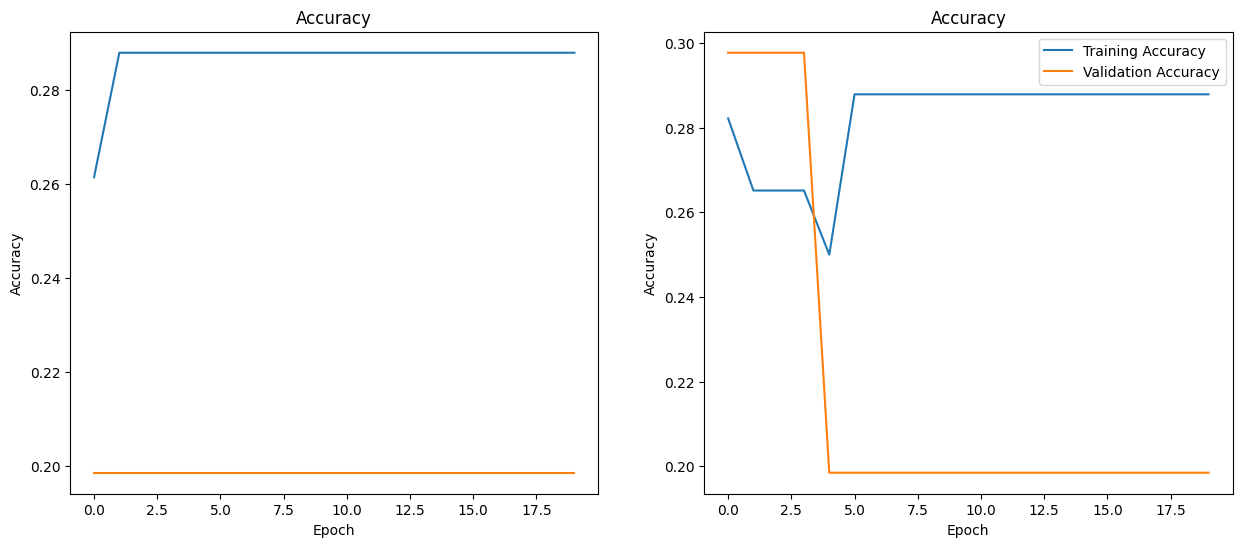

In [31]:

training_accuracy1 = new_history1.history['accuracy']
validation_accuracy1 = new_history1.history['val_accuracy']

training_accuracy2 = new_history2.history['accuracy']
validation_accuracy2 = new_history2.history['val_accuracy']

fig,axes = plt.subplots(1,2,figsize=(15,6))
axes[0].plot(training_accuracy1, label='Training Accuracy')
axes[0].plot(validation_accuracy1, label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

axes[1].plot(training_accuracy2, label='Training Accuracy')
axes[1].plot(validation_accuracy2, label='Validation Accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
plt.legend()

plt.show()


# 2 (d)

1. The initial model appears to suffer from overfitting. While the training accuracy increased to 84%, the validation accuracy remained below 25%.

2. In the  experiment model 1 and model 2 suffers from undefitting , as persistently low  accuracies across both training and validation sets.

# 3

In [33]:
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    return data

In [34]:
train_data = load_data("/content/drive/MyDrive/DM3/student_23/train.json")
val_data = load_data("/content/drive/MyDrive/DM3/student_23/validation.json")
test_data = load_data("/content/drive/MyDrive/DM3/student_23/test.json")


In [36]:
dataset = DatasetDict({
    "train": Dataset.from_list(train_data),
    "validation": Dataset.from_list(val_data),
    "test": Dataset.from_list(test_data)
})

dataset.save_to_disk("sem_eval_dataset")


Saving the dataset (0/1 shards):   0%|          | 0/3000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/400 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1500 [00:00<?, ? examples/s]

In [37]:
labels = [label for label in dataset['train'].features.keys() if label not in ['ID', 'Tweet']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness',
 'surprise',
 'trust']

In [38]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
  text = examples["Tweet"]
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  labels_matrix = np.zeros((len(text), len(labels)))
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()

  return encoding

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [39]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [40]:
encoded_dataset.set_format("torch")

In [41]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased",
                                                           problem_type="multi_label_classification",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
batch_size = 8
metric_name = "f1"

In [43]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
)

In [44]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch

def multi_label_metrics(predictions, labels, threshold=0.5):
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        labels=p.label_ids)
    return result

In [45]:
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
outputs

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


SequenceClassifierOutput(loss=tensor(0.6401, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), logits=tensor([[ 0.7788, -0.0009,  0.4671,  0.0596, -0.2869, -0.1744, -0.3475,  0.1844,
          0.2262, -0.1921,  0.0752]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [46]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [47]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: ERROR API key must be 40 characters long, yours was 25


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,No log,0.354214,0.617700,0.736169,0.192500
2,0.407500,0.327928,0.643457,0.750446,0.220000
3,0.296000,0.322414,0.681406,0.778505,0.247500
4,0.246800,0.320954,0.663578,0.765654,0.220000
5,0.246800,0.320341,0.692521,0.788160,0.250000


TrainOutput(global_step=1875, training_loss=0.29769027099609374, metrics={'train_runtime': 519.0228, 'train_samples_per_second': 28.9, 'train_steps_per_second': 3.613, 'total_flos': 986746187520000.0, 'train_loss': 0.29769027099609374, 'epoch': 5.0})

In [48]:
test_results = trainer.evaluate(encoded_dataset["test"])
print("Test Results:", test_results)


Test Results: {'eval_loss': 0.31512686610221863, 'eval_f1': 0.6829931972789116, 'eval_roc_auc': 0.7830501218682399, 'eval_accuracy': 0.2713333333333333, 'eval_runtime': 10.7438, 'eval_samples_per_second': 139.616, 'eval_steps_per_second': 17.499, 'epoch': 5.0}


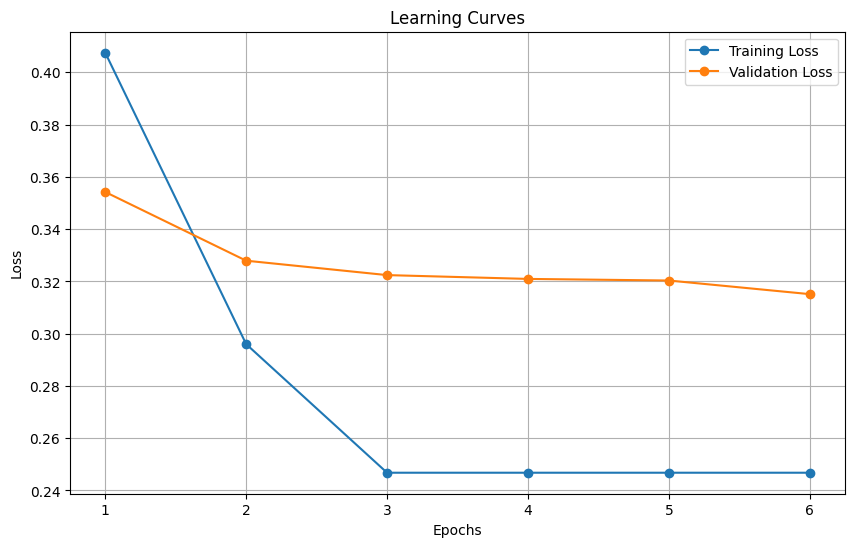

In [52]:
train_losses = [log["loss"] for log in trainer.state.log_history if "loss" in log]
train_losses += [train_losses[-1]]*3
val_losses = [log["eval_loss"] for log in trainer.state.log_history if "eval_loss" in log]

epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Training Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curves")
plt.legend()
plt.grid()
plt.show()

In [50]:
from sklearn.metrics import accuracy_score
import numpy as np

predictions = trainer.predict(encoded_dataset["test"])
preds_logits = predictions.predictions
true_labels = predictions.label_ids

sigmoid = torch.nn.Sigmoid()
probs = sigmoid(torch.Tensor(preds_logits)).numpy()

threshold = 0.5
binary_preds = (probs >= threshold).astype(int)

def exact_match_accuracy(predictions, labels):
    return np.mean(np.all(predictions == labels, axis=1))

def at_least_one_match_accuracy(predictions, labels):
  acc=0
  for i,j in zip(binary_preds,true_labels):
    for(a,b) in zip(i,j):
      if((a==b) and a == 1):
        acc +=1
        break
  return acc/len(predictions)

exact_match_acc = exact_match_accuracy(binary_preds, true_labels)
at_least_one_match_acc = at_least_one_match_accuracy(binary_preds, true_labels)

print(f"Exact Match Accuracy: {exact_match_acc * 100:.2f}%")
print(f"At Least One Match Accuracy: {at_least_one_match_acc * 100:.2f}%")


Exact Match Accuracy: 27.13%
At Least One Match Accuracy: 85.87%
